In [1]:
import numpy as np
import math
from matplotlib import pyplot as plt
import datetime
import time as timemodule
import os
import pandas as pd

In [2]:
path = 'files'
filelist = os.listdir(path)
L = len(filelist)

In [3]:
filelist

['TSENSOR_6_KS.LOG',
 'tsensor_calibration.txt',
 'tsensor_calibration_time_constant_new.log',
 'TSENSOR_cleaned.LOG',
 'TSENSOR_DF.LOG',
 'TSENSOR_DKB.LOG',
 'TSENSOR_kmroz_fixed.LOG',
 'TSENSOR_LG.LOG',
 'TSENSOR_QR.LOG',
 'TSENSOR_SimonS.LOG']

# time constant

In [4]:
fileREF = path + '/' + filelist[2]
tsensor_REF =pd.read_csv(fileREF, sep=',', comment='#',names=["time","temperature"])

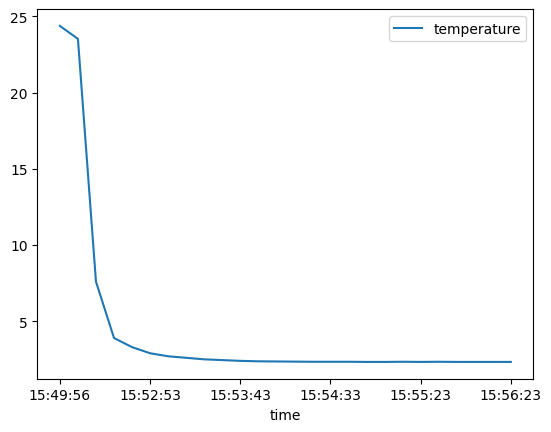

In [5]:
tsensor_REF.plot('time','temperature')
plt.show()

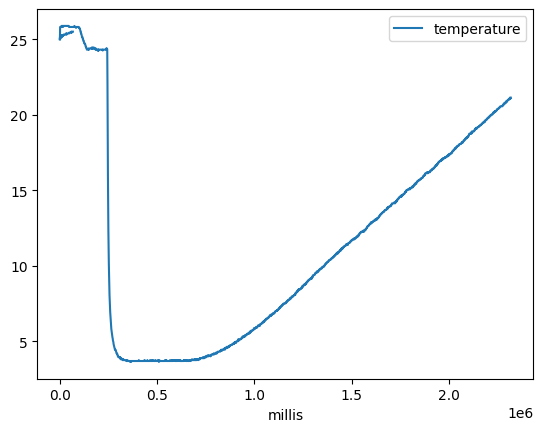

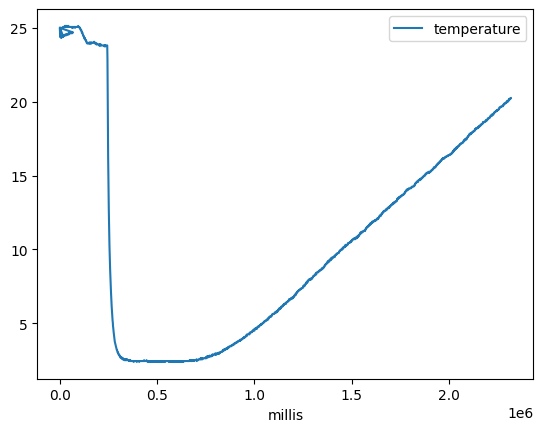

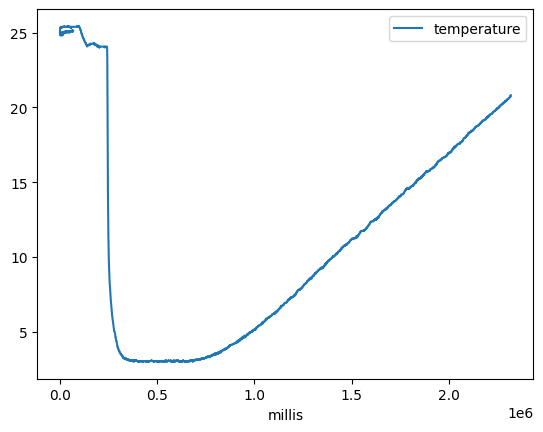

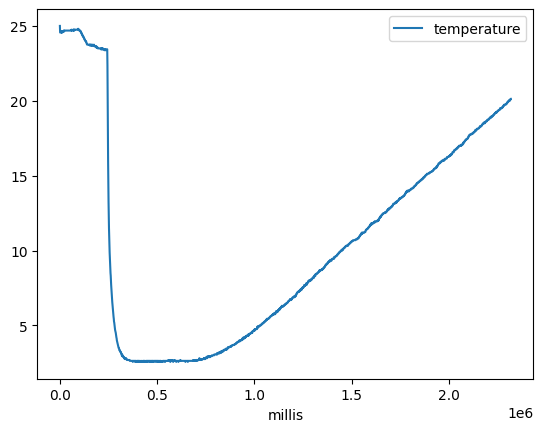

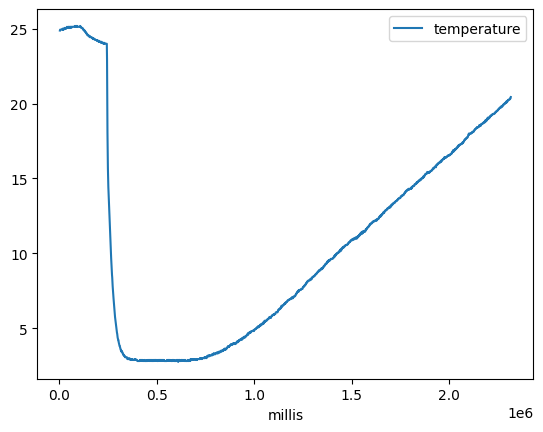

In [6]:
for i in [0,3,4,6,7]:
    filename = path + '/' + filelist[i]
    tsensor = pd.read_csv(filename, sep=',', comment='#',names=["time","millis","ID","temperature"])
    tsensor.plot('millis','temperature')
    plt.show()

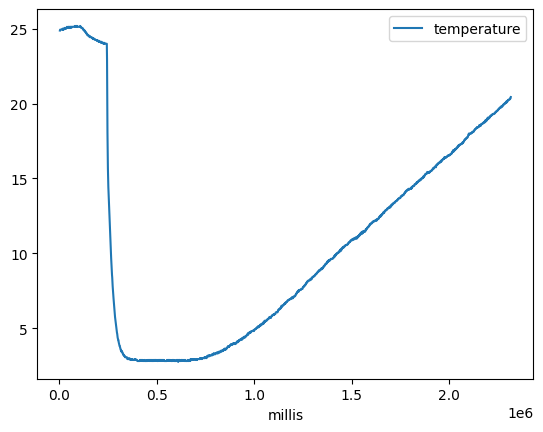

In [7]:
file_KS = filename = path + '/' + filelist[0]
tsensor_KS = pd.read_csv(file_KS, sep=',', comment='#',names=["time","millis","ID","temperature"])
tsensor.plot('millis','temperature')
plt.show()

In [11]:
time_KS = tsensor_KS.time.to_numpy()
millis_KS = tsensor_KS.millis.to_numpy()
temp_KS = tsensor_KS.temperature.to_numpy()

In [12]:
millis_KS.size

2064

In [13]:
# find temperature drop
I = ~np.isnan(temp_KS)
# get rid of nan
temp_KS = temp_KS[I]
time_KS = time_KS[I]
millis_KS = millis_KS[I]

temp_gradient = np.gradient(temp_KS)
ind_drop = np.argmin(temp_gradient)

285

In [18]:
temp_KS[270:290]

array([24.31, 24.31, 24.31, 24.31, 24.31, 24.31, 24.31, 24.31, 24.38,
       24.31, 24.38, 24.31, 24.38, 24.31, 22.13, 18.75, 16.  , 13.88,
       12.31, 11.06])

In [ ]:
plt.plot(millis_KS[75:380], temp_KS[75:380])

In [14]:
temp_gradient[285]

-3.0649999999999995

In [ ]:
millis_KS[75:90]

In [ ]:
plt.plot(np.gradient(temp_KS))